# Вчитување на потребните библиотеки

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
import plotly.io as pio
pio.renderers.default = 'colab'
import matplotlib.pyplot as plt
import scipy
from pandas.plotting import scatter_matrix
import warnings
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
%matplotlib inline


# Вчитување на податочното множество
Податочното множество е земено од следниот линк: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

# Основни информации за податочното множество

In [4]:
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Проверка на типовите на подотоци за секоја колона и проверка дали имаме вредности кои недостасуваат или null вредности.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Како што може да видиме од извршувањето на претходната команда имаме 1599 записи, немаме null вредности и вредности кои недостасуваат. Сите колони имаат нумерички вредности, сите атрибути се реални броеви, само класниот атрибут е цел број. 
# Поделба на податочното множество
df - се чуваат атрибутите df_target - се чува класата на записите

In [6]:
df=dataset[dataset.columns[:-1]].copy()
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
df_target=dataset[dataset.columns[-1:]].copy()
df_target.head(5)

,quality
0,5
1,5
2,5
3,6
4,5


Претставување на дескриптивните статистики на секој од атрибутите на податочното множество


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


# Визуелизации

Претставување на атрибутите на податочното множество со цел да се запознаеме со меѓусебниот сооднос на атрибутите и осегот на вредности со кои располагаме


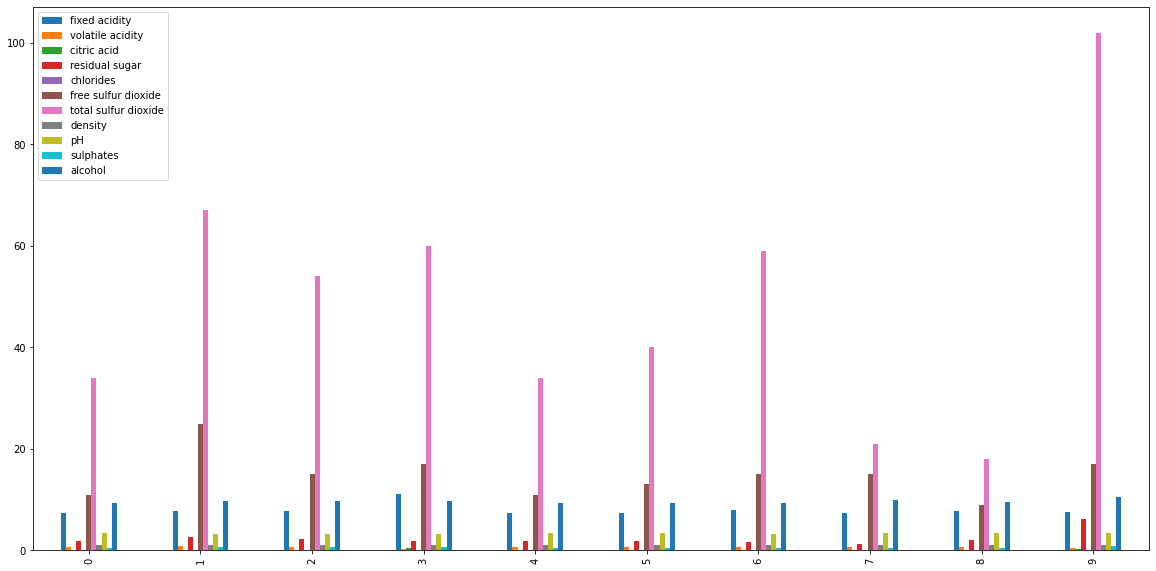

In [9]:
df.head(10).plot.bar(figsize=(20,10))

Претставување на класниот атрибут, односно претставување на тоа колку примероци на која класа припаѓаат.

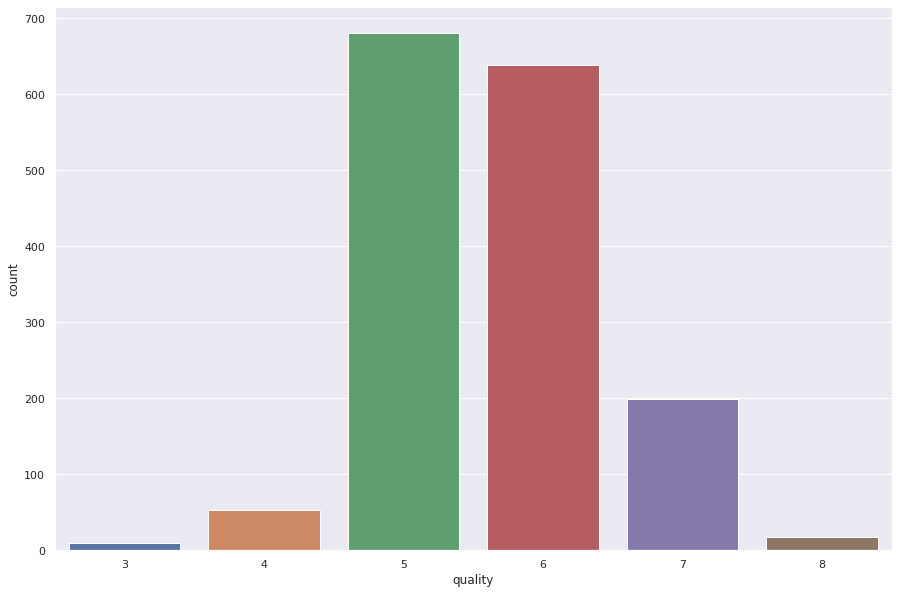

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x=dataset['quality'])

In [11]:
ds_alcohol=dataset.groupby(["quality"])["alcohol"].mean().reset_index()
ds_alcohol.columns=['quality', 'alcohol']

In [12]:
ds_pH=dataset.groupby(["quality"])["pH"].mean().reset_index()
ds_pH.columns=['quality', 'pH']

In [13]:
ds_density=dataset.groupby(["quality"])["density"].mean().reset_index()
ds_density.columns=['quality', 'density']

In [14]:
ds_sugar=dataset.groupby(["quality"])["residual sugar"].mean().reset_index()
ds_sugar.columns=["quality", "sugar"]

In [16]:
trace=go.Scatter(
x=ds_alcohol.quality,
y=ds_alcohol.alcohol,
mode="lines+markers",
name="аlcohol",
marker=dict(color='rgba(80,26,80,0.8)')
)

trace1=go.Scatter(
x=ds_pH.quality,
y=ds_pH.pH,
mode="lines+markers",
name="pH",
marker=dict(color='rgba(225,26,10,0.8)')
)

trace2=go.Scatter(
x=ds_density.quality,
y=ds_density.density,
mode="lines+markers",
name="density",
marker=dict(color='rgba(136,48,10,0.8)')
)

trace3=go.Scatter(
x=ds_sugar.quality,
y=ds_sugar.sugar,
mode="lines+markers",
name="residual sugar",
marker=dict(color='rgba(20,150,200,0.8)')
)

data=[trace, trace1, trace2, trace3]

layout = dict(title="Average of some of the most important features for every class", xaxis= dict(title= 'Average of some important features.',ticklen= 5,zeroline= False))

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig)
fig.show(renderer="colab")


## Kernel Density Estimation and Histogram
Претставување на Kernel Density Estimation и Histogram за секој од атрибутите на посебен график, со цел претпоставка на дистрибуцијата на секој од атрибутите.

Text(0.5, 0.98, 'Kernel Density Estimation and Histogram')

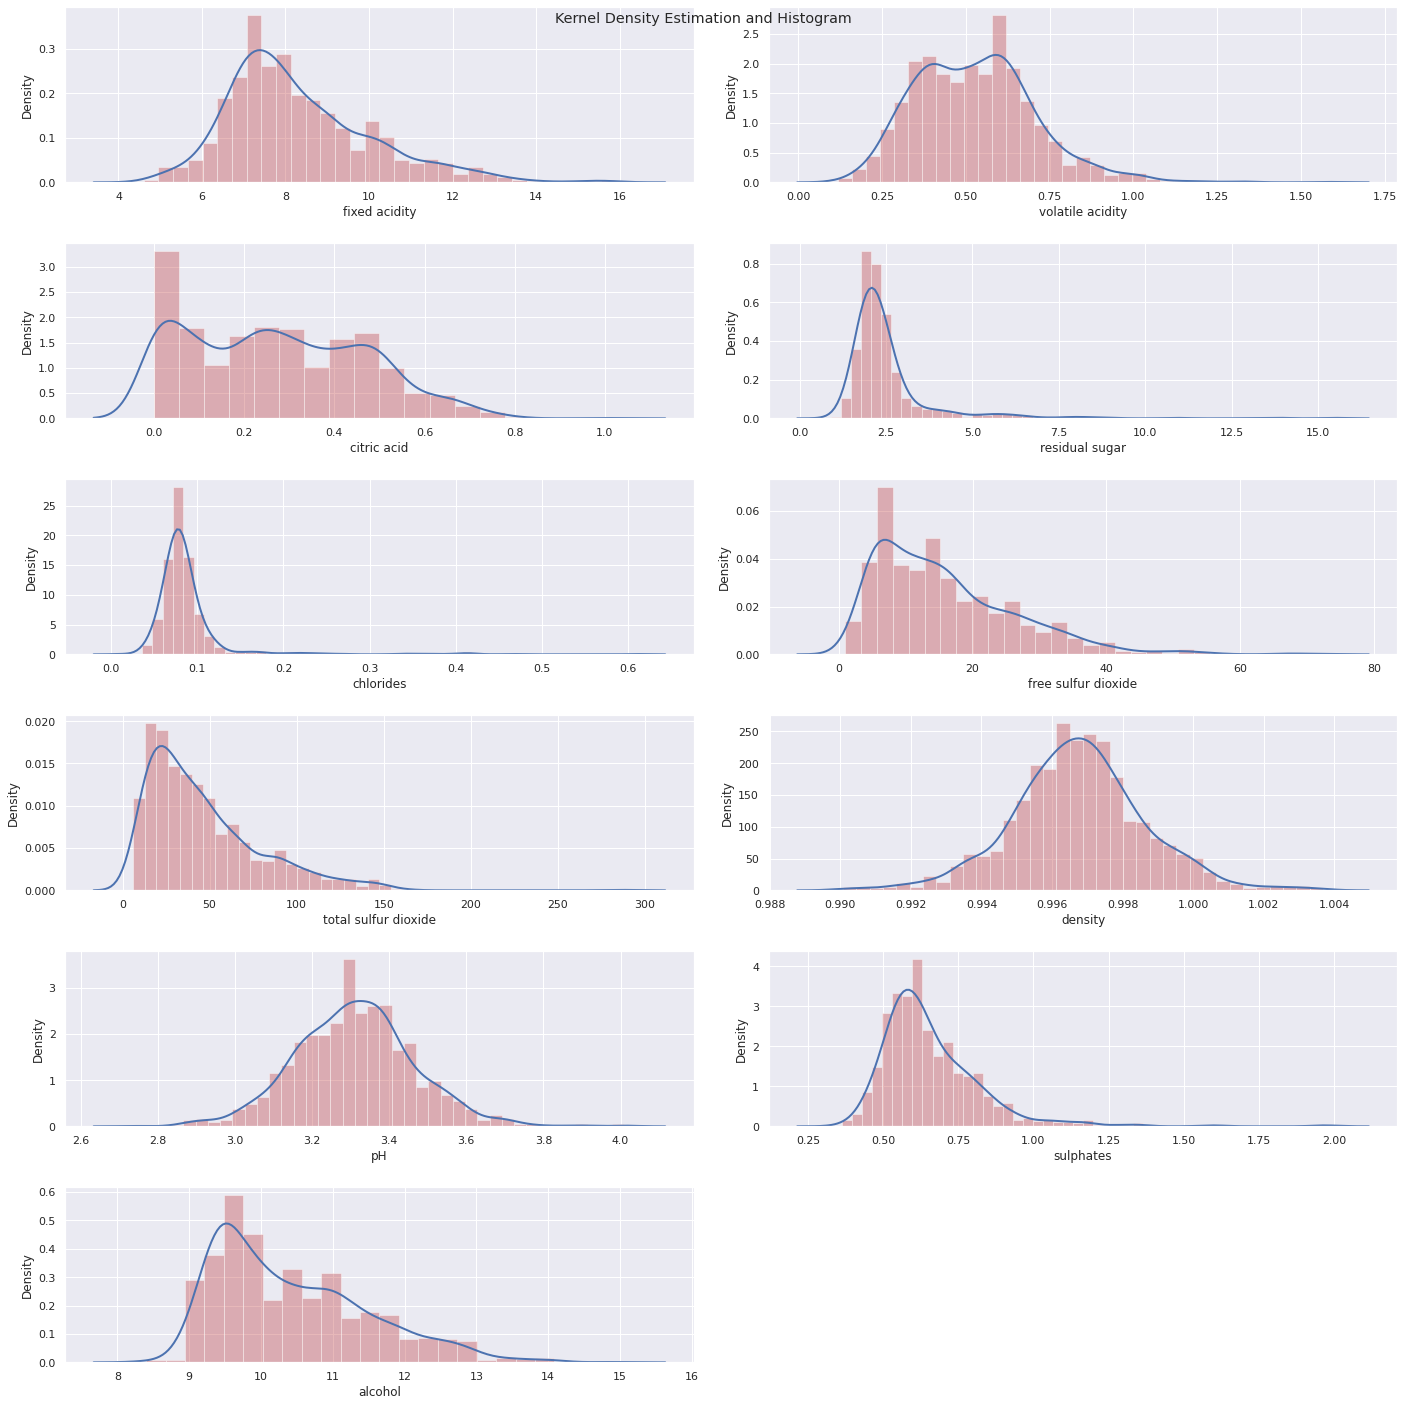

In [17]:
fig = plt.figure(figsize=(20,20))
for index,column in enumerate(list(df.columns)):
    plt.subplot(6,2,index+1)
    sns.distplot(df.loc[:, column], hist_kws={"color":"r"}, kde_kws={"color":"b", "lw":2})
fig.tight_layout(pad = 2)
fig.suptitle("Kernel Density Estimation and Histogram")

## Q-Q Plot
Споредба дали два атрибути имаат иста распределба. Од Kernel Density Estimation и Histograms гледам кои два атрибути имаат слични распределби и ги споредувам со цел да го најдам отстапувањето.

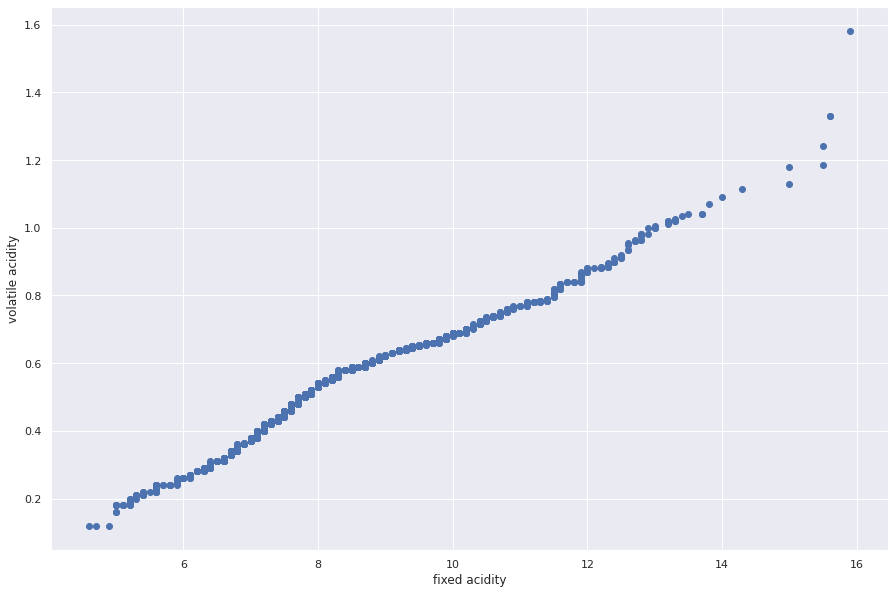

In [18]:
plt.figure()
plt.scatter(np.sort(df["fixed acidity"]), np.sort(df["volatile acidity"]))
plt.xlabel("fixed acidity")
plt.ylabel("volatile acidity")
plt.show()
plt.close()

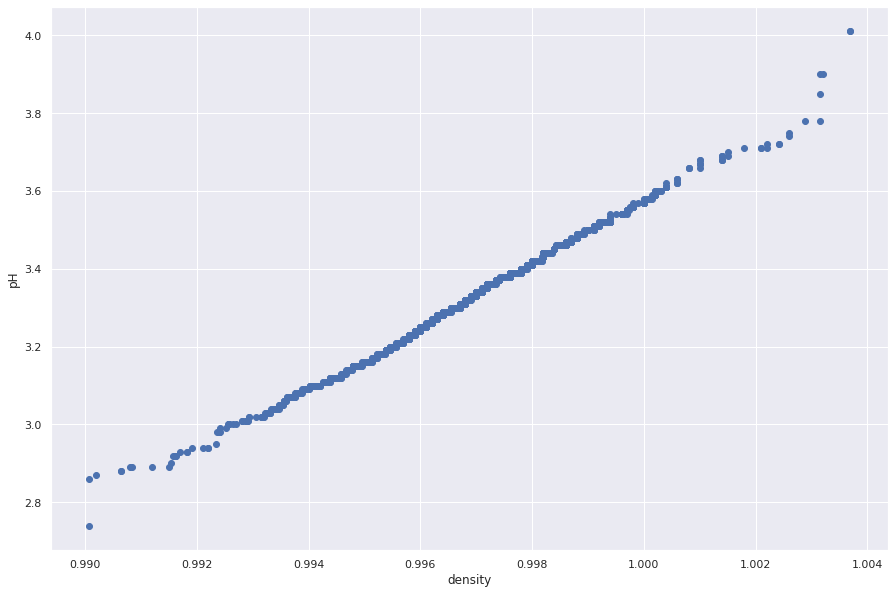

In [19]:
plt.figure()
plt.scatter(np.sort(df["density"]), np.sort(df["pH"]))
plt.xlabel("density")
plt.ylabel("pH")
plt.show()
plt.close()

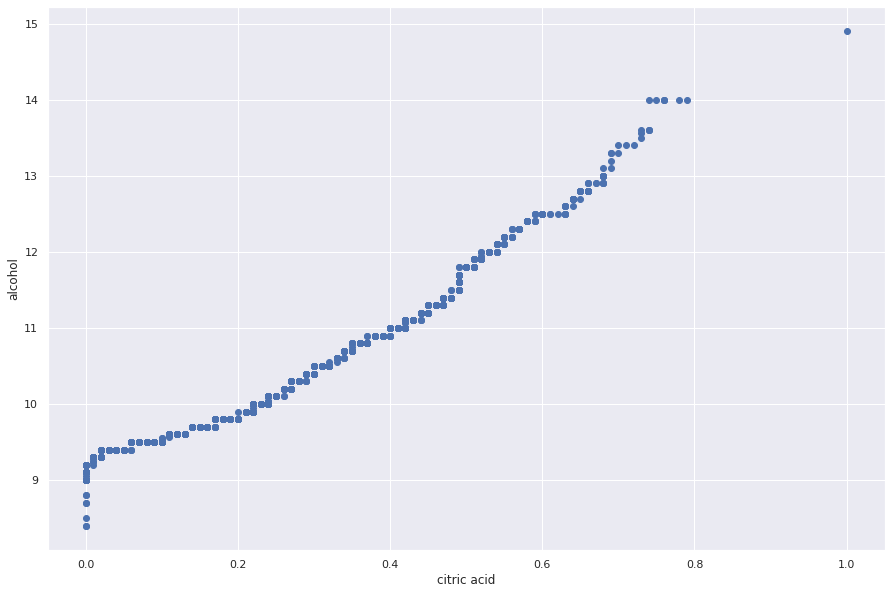

In [20]:
plt.figure()
plt.scatter(np.sort(df["citric acid"]), np.sort(df["alcohol"]))
plt.xlabel("citric acid")
plt.ylabel("alcohol")
plt.show()
plt.close()

## Probability Plot

Колку дадена дистрибуција е блиску до нормална распределба, проверувам за тие атрибути чиј што хистограм наликува на хистограмот на нормална распределба, сепак не можеме да кажеме дека и овие атрибути ја следат нормалната распределба.


((array([-3.33053651, -3.075151  , -2.93323893, ...,  2.93323893,
          3.075151  ,  3.33053651]),
  array([0.99007, 0.99007, 0.9902 , ..., 1.0032 , 1.00369, 1.00369])),
 (0.0018813630041065905, 0.9967466791744841, 0.9953144337960912))

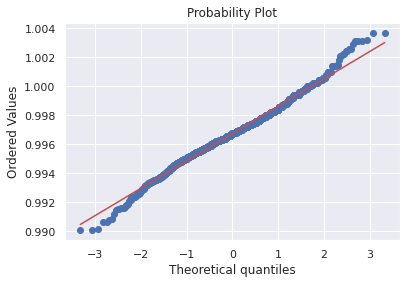

In [23]:
scipy.stats.probplot(df["density"], dist="norm", plot=plt)

((array([-3.33053651, -3.075151  , -2.93323893, ...,  2.93323893,
          3.075151  ,  3.33053651]),
  array([2.74, 2.86, 2.87, ..., 3.9 , 4.01, 4.01])),
 (0.15407790029628837, 3.311113195747342, 0.9964776998725273))

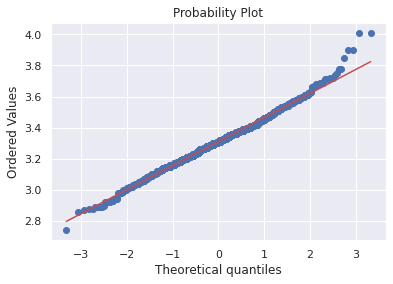

In [24]:
scipy.stats.probplot(df["pH"], dist="norm", plot=plt)

# Correlation
## Pearson Correlation

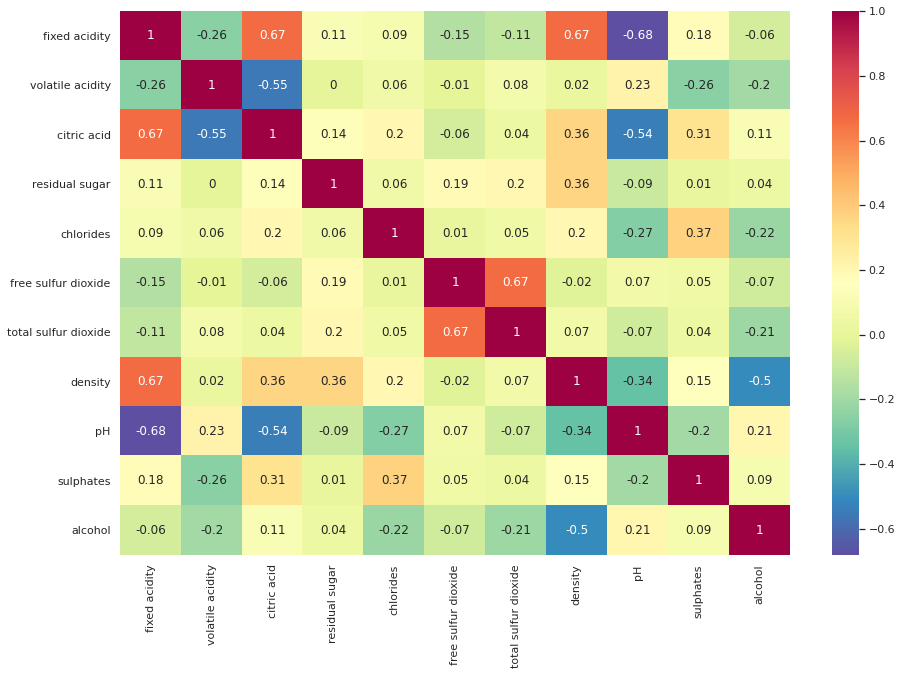

In [28]:
corrPearson=df.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(round(corrPearson,2), cmap='Spectral_r', annot=True)

Определување на линеарна врска помеѓу атрибутите. Може да забележиме дека повеќето атрибути немаат голема меѓусебна линеарна поврзаност. 

## Spearman Correlation

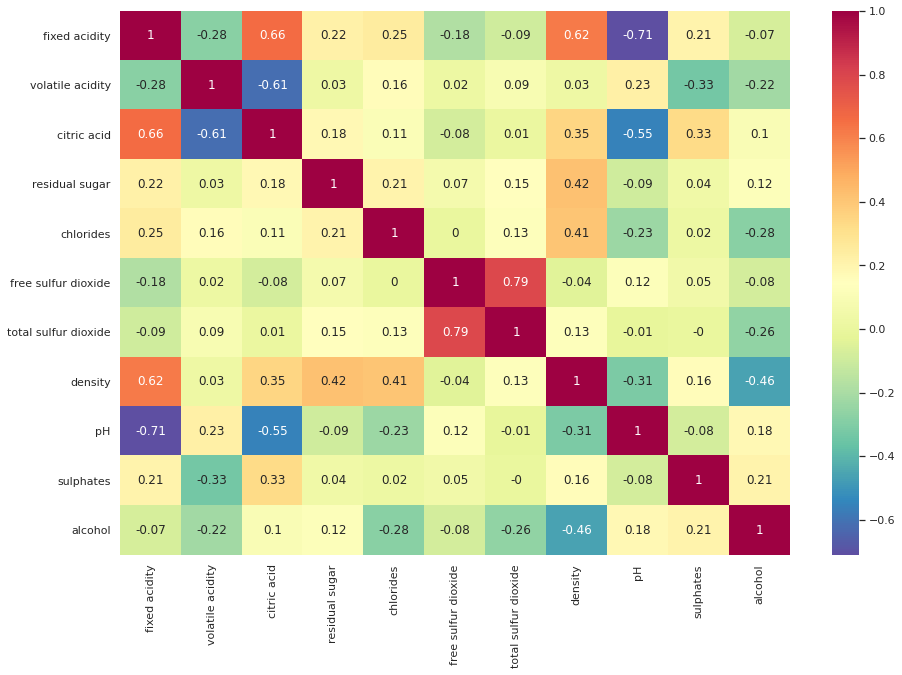

In [29]:
corrSpearman=df.corr(method="spearman")
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(round(corrSpearman,2), cmap='Spectral_r', annot=True)

Мерка за јачината на монотоната врска помеѓу атрибутите. Можеме да забележиме дека немаме атрибути со голем коефициент. Како исклучок може да се јават само 

*   total sulfur dioxide - free sulfur dioxide
*   pH - fixed acidity
*   citric acid - fixed acidity

за кои може да кажеме дека имаат јака монотона врска помеѓу себе.
 

## Scatter plot matrix

Претходните зависности помеѓу атрибутите може да ги забележиме и на следната матрица.

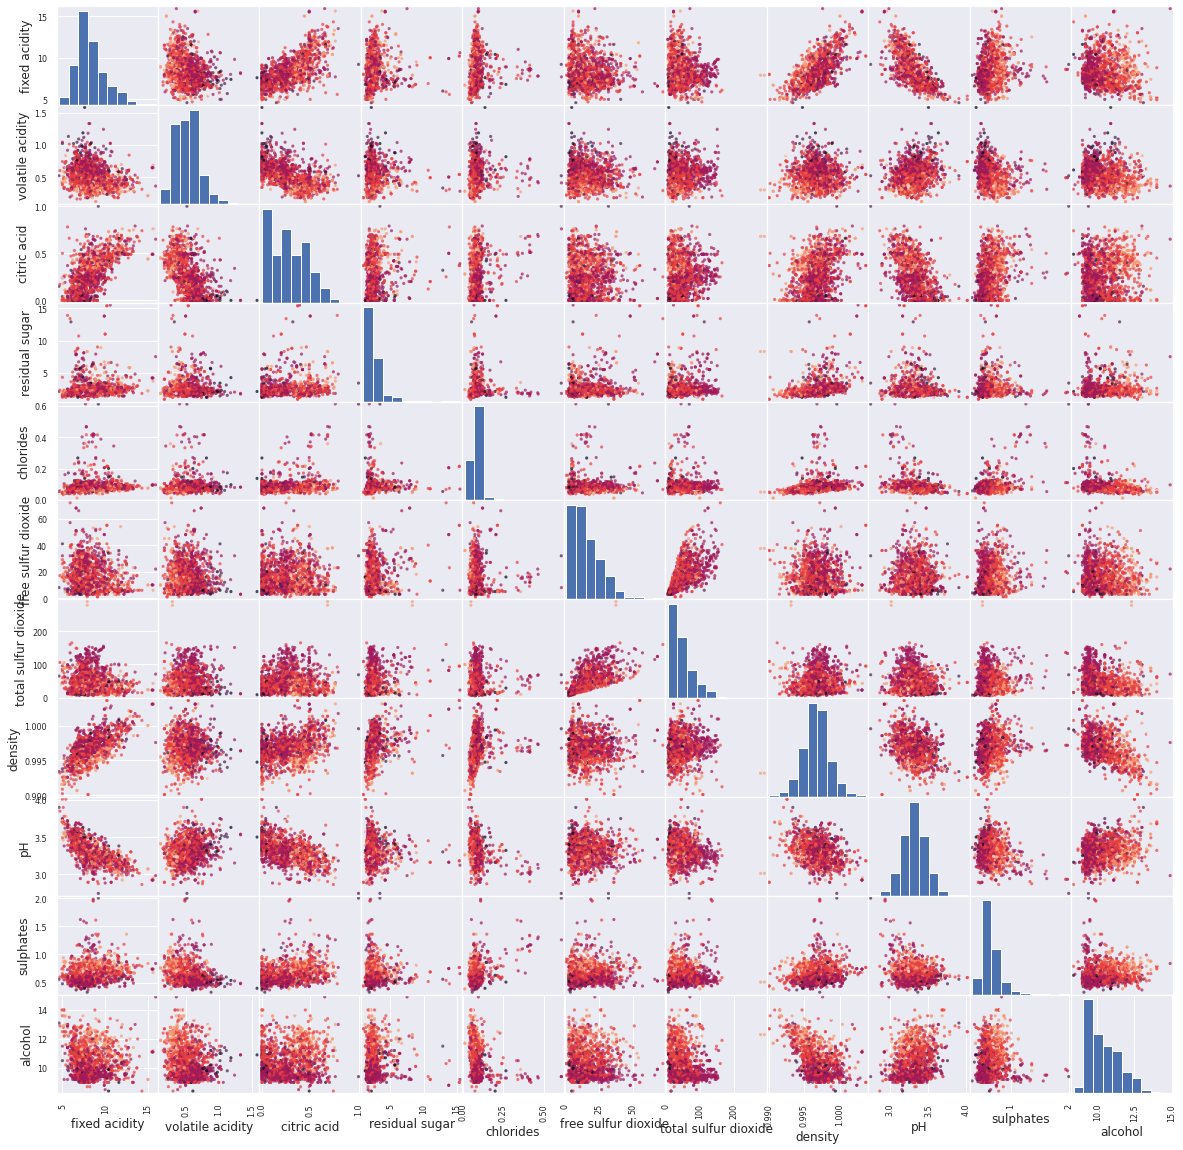

In [27]:
scatter_matrix(df, c=df_target["quality"], marker='o', s=10, alpha=0.7, figsize=[20, 20])
plt.show()

# Определување на Outliers
## Box plots

Претставување на Box Plot за секој од атрибутите посебно.


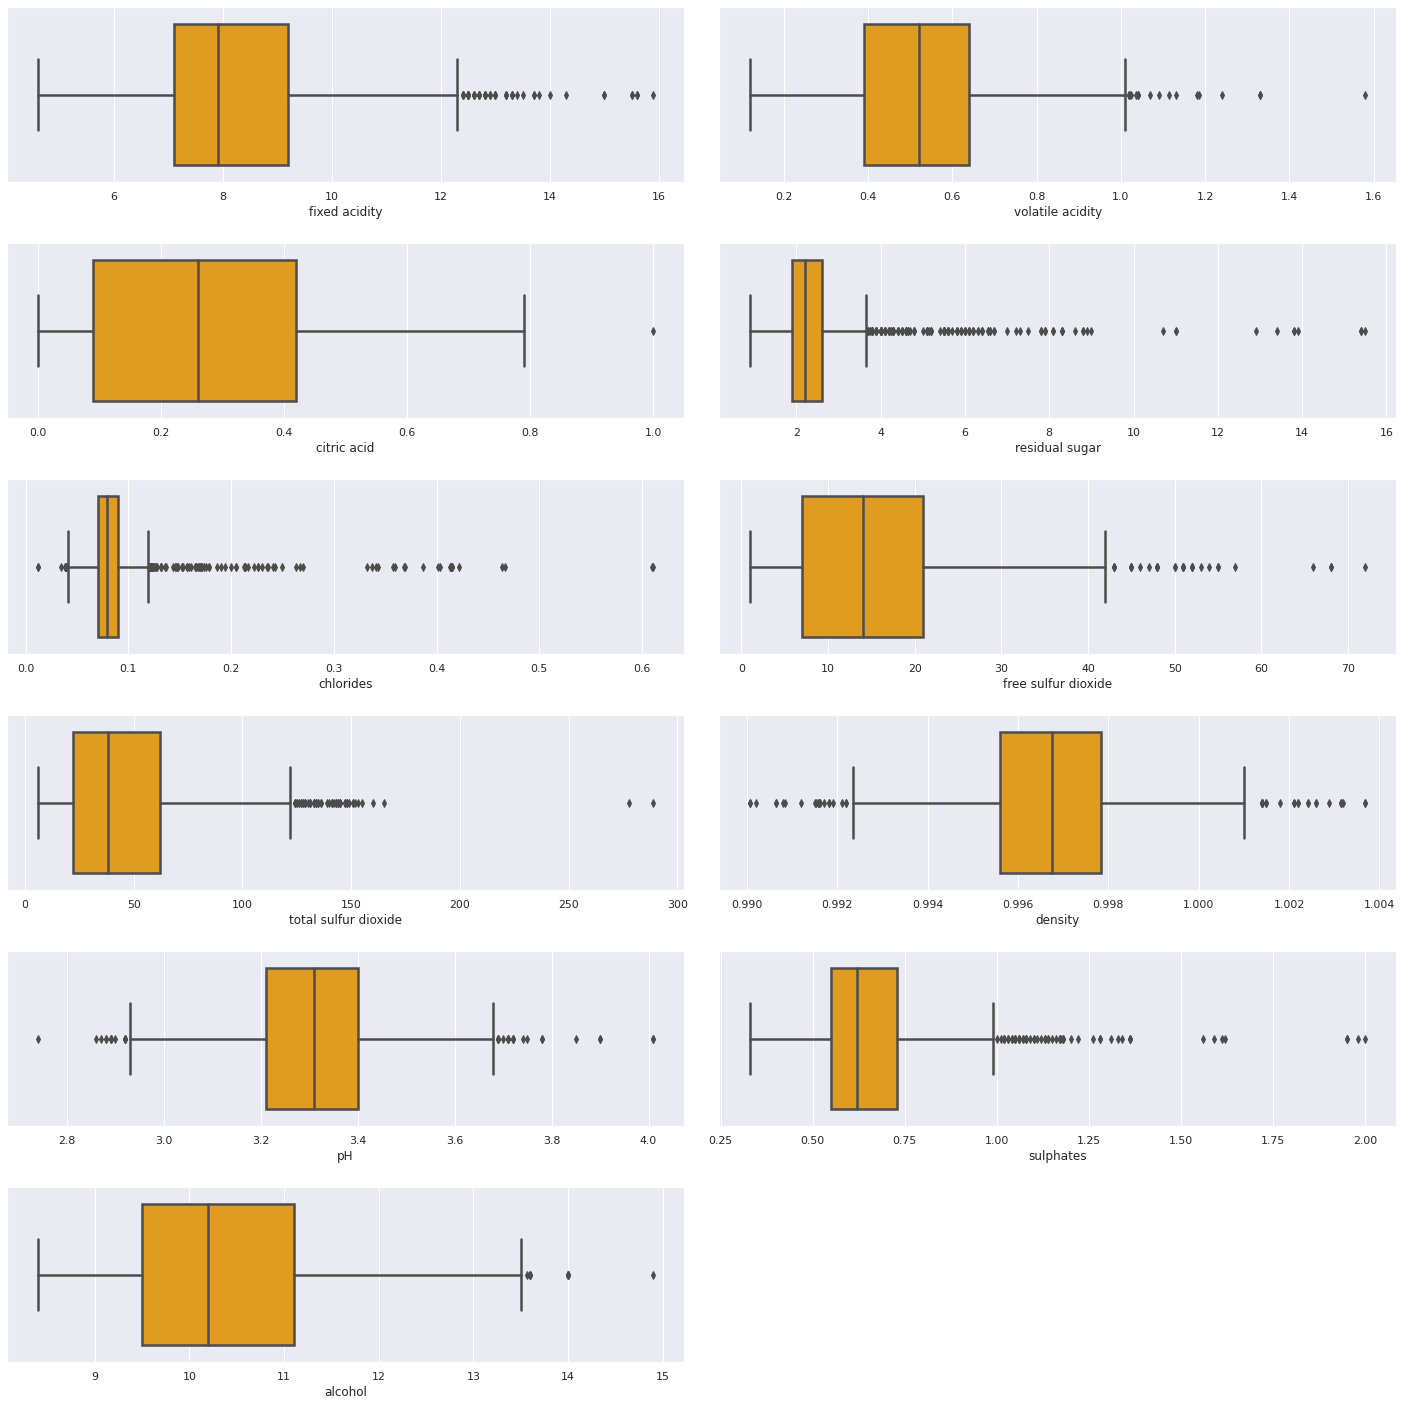

In [34]:
fig = plt.figure(figsize=(20,20))
for index,column in enumerate(list(df.columns)):
    plt.subplot(6,2,index+1)
    sns.boxplot(df.loc[:, column],color="Orange", linewidth=2.5)
fig.tight_layout(pad = 2)

Како што може да забележиме од дијаграмите, сите атрибути имаат outliers во помал или во поголем број. За да се справиме со нив, ни треба и некое експертско знаење за вредностите на секој од атрибутите, односно дали се можни овие вредноти на outliers или се добиени како резултат на некоја грешка при мерењето. Бидејќи доколку само ги избришеме може да сториме добро, но и може да избришеме некој значаен запис кој ни кажува за некоја нова карактеристична промена. Затоа при изработката, ќе користам два различни dataframes, еден во кој ќе ги избришам outliers и еден во кој ќе останат.   

In [42]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
dtype: float64


## Униваријантни outliers

In [43]:
outliers=((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))
for index,column in enumerate(list(df.columns)): 
    print(outliers[column].value_counts())

False    1550
True       49
Name: fixed acidity, dtype: int64
False    1580
True       19
Name: volatile acidity, dtype: int64
False    1598
True        1
Name: citric acid, dtype: int64
False    1444
True      155
Name: residual sugar, dtype: int64
False    1487
True      112
Name: chlorides, dtype: int64
False    1569
True       30
Name: free sulfur dioxide, dtype: int64
False    1544
True       55
Name: total sulfur dioxide, dtype: int64
False    1554
True       45
Name: density, dtype: int64
False    1564
True       35
Name: pH, dtype: int64
False    1540
True       59
Name: sulphates, dtype: int64
False    1586
True       13
Name: alcohol, dtype: int64


Од овде може да забележиме дека кај сите атрибути имаме outliers, најголем е бројот на униваријантни outlirs кај citric acid и residual sugar.

## Мултиваријантни outliers

Со следната функција определуваме мултиваријантни outliers, односно ги земаме записите кои имаат outliers по 3 или повеќе атрибути.

In [35]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [40]:
dataset.loc[detect_outliers(dataset, list(df.columns))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


Знаејки дека множестото е ординално, односно класниот атрбут претавува оценка на квалитетот на виното, можеме да забележиме дека miltivariate outliers не се јавуваат на кај каласите кои се поретки. Туку кај класите кај кои имаме голем број на примероци, па според тоа може да си дозволиме да ги избришеме, вредностите кои се наоѓаат во табелата, односно имаат outliers по повеќе од 2 атрибути.

## Отстранување на мултиваријантните outliers од податочното множество

In [44]:
dataset_outliers = dataset.drop(detect_outliers(dataset,dataset.columns[:-1]),axis = 0).reset_index(drop = True)
dataset_outliers.shape

(1566, 12)

In [46]:
df_out=dataset_outliers[dataset_outliers.columns[:-1]].copy()
df_target_out=dataset_outliers[dataset_outliers.columns[-1:]].copy()

(1566, 11)

# Скалирање на податочното множество

In [53]:
df_scaled=df.copy()
scaler=MinMaxScaler()
df_scaled[list(df.columns)]=scaler.fit_transform(df_scaled[list(df.columns)])
df_scaled.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [54]:
df_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Редукција на димензионалноста

## PCA

In [62]:
pca = PCA(n_components = 2)
pca.fit(df)

data_pca_2D = pca.transform(df)

print("Original shape: {}".format(str(df.shape)))
print("Reduced shape: {}".format(str(data_pca_2D.shape)))

Original shape: (1599, 11)
Reduced shape: (1599, 2)


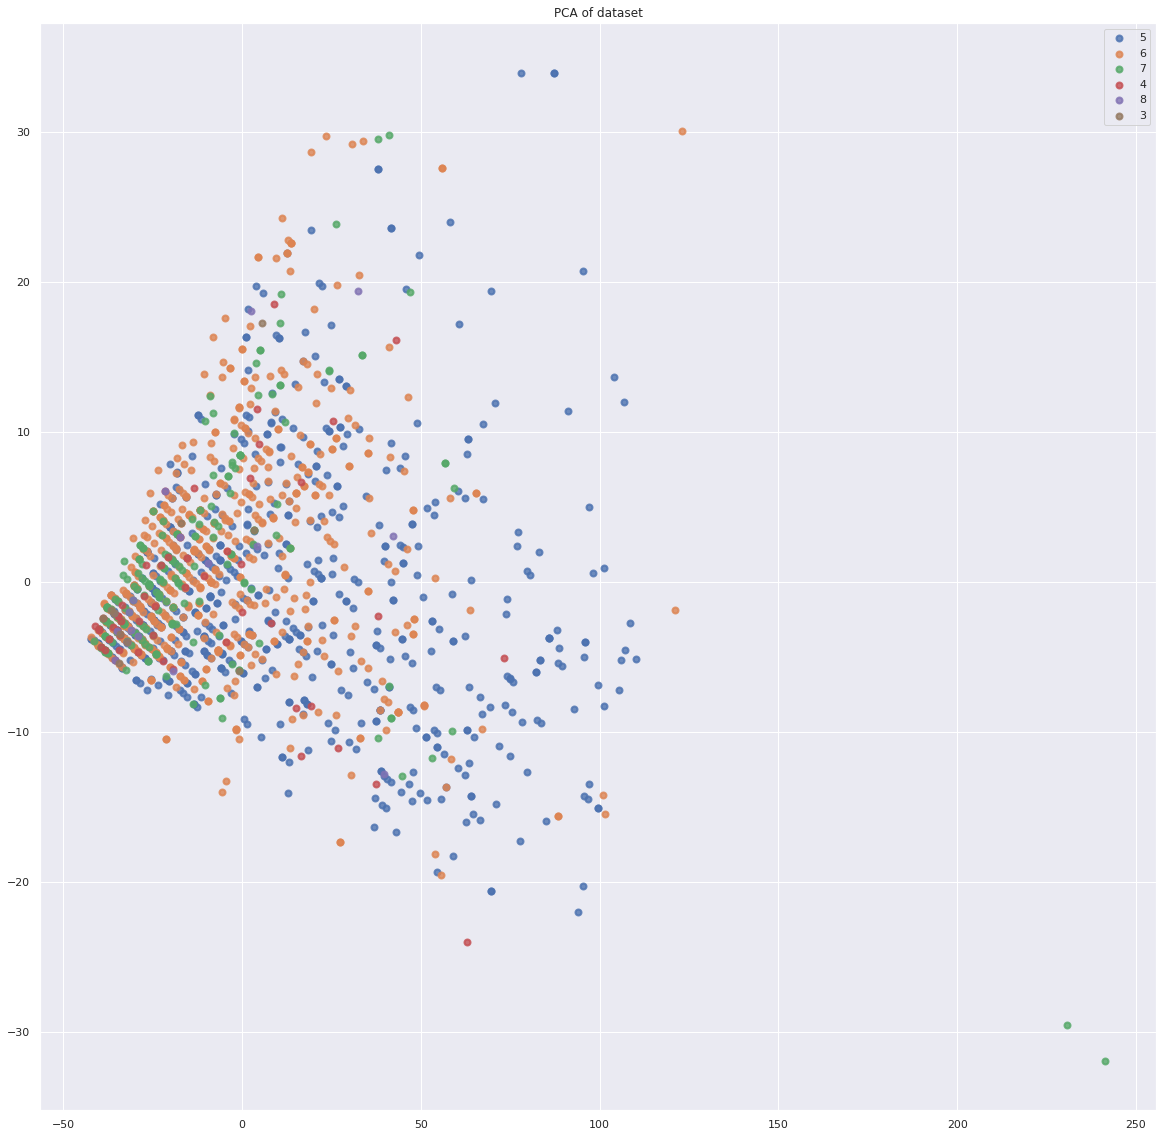

In [66]:
plt.figure(figsize=(20, 20))
for i, target_name in zip(list(df_target.quality.unique()), list(df_target.quality.unique())):
    plt.scatter(data_pca_2D[df_target["quality"] == i, 0],data_pca_2D[df_target["quality"] == i, 1], alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')
plt.show()